In [29]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [31]:
df_subset = df[['area', 'price','rooms']]
df_subset.head()

,area,price,rooms
0,108,510000,3
1,47,215000,2
2,116,325000,3
3,58,315000,3
4,63,200000,3


In [33]:
#eliminating 'wrong' data from the subset to get a more realistic dataset
df_subset = df_subset[df_subset['price'] > 30000]
df_subset = df_subset[df_subset['rooms'] > 0]
df_subset = df_subset[df_subset['area'] > 0]

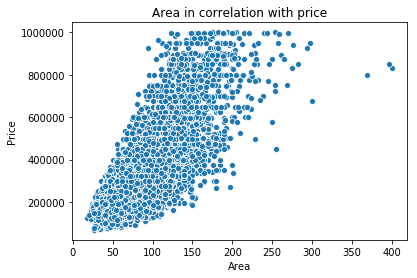

In [34]:
sns.scatterplot(x="area", y="price", data=df_subset)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area in correlation with price')
plt.show()

The relation is somewhat linear, the points lie around a virtual line. <br>
However, the variation seems to increase with higher pricing and larger area.

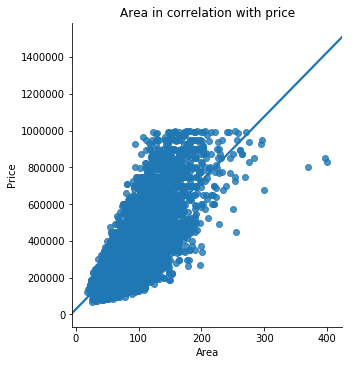

In [35]:
sns.lmplot(x="area", y="price", data=df_subset, ci= False)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area in correlation with price')
plt.show()

In [36]:
x = df[['area']] 
y = df['price']
lm = LinearRegression()
lm.fit(x, y) 

b0 = lm.coef_[0]
b1 = lm.intercept_

The regression line is equal to: <br>
$ y= 3498.81 + 27983X$

In [38]:
y=3498.81+(27983.93*70)
y

1962373.9100000001

In [39]:
lm.predict(70)

array([286894.17672918])

In [63]:
df['p_price'] = lm.predict(x)

In [64]:
house = df[df['address']=='Slichtenhorststraat 10']
house

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,p_price
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,337034.858615


In [65]:
residual = house['price'] - house['p_price']
residual

21   -102534.858615
dtype: float64

In [67]:
print(f"The prices for the house on Slichthenhorststraat is: {int(house['price'])}")
print(f"The predicted price is: {int(house['p_price'])}")
print(f"Which makes the residual: {int(residual)}")

The prices for the house on Slichthenhorststraat is: 234500
The predicted price is: 337034
Which makes the residual: -102534
